# Extracting time series of individual generators from ENTSO-E data

In [1]:
import os, sys
sys.path.append('../TimeSeries/')

import time_series as ts
import entso_e

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

Directory in which the ENTSO-E data has been downloaded (see the notebook [ENTSO-E_time_series](./ENTSO-E_time_series.ipynb) for more info):

In [3]:
data_source = os.path.expanduser('~/data/entso-e/raw')

Select a year:

In [4]:
year = 2023

List available production types:

In [5]:
entso_e.extract_individual_production_types(data_source, year)

['Wind Offshore',
 'Fossil Hard coal',
 'Fossil Brown coal/Lignite',
 'Wind Onshore',
 'Fossil Oil shale',
 'Fossil Oil',
 'Fossil Gas',
 'Biomass',
 'Hydro Run-of-river and poundage',
 'Hydro Water Reservoir',
 'Hydro Pumped Storage',
 'Nuclear',
 'Fossil Coal-derived gas',
 'Waste',
 'Solar',
 'Fossil Peat',
 'Other',
 'Geothermal']

## Example: nuclear in Switzerland

List Switzerland's nuclear generators:

In [6]:
entso_e.extract_generators_names(data_source, year, 'Nuclear', 'CH')

['Kernkraftwerk Gösgen', 'Beznau 1', 'Leibstadt', 'Beznau 2']

Extract data:

In [7]:
CH_nuclear_data = entso_e.extract_production_by_unit_time_series(data_source, year, gen_type = 'Nuclear', country_code = 'CH')

  0%|          | 0/12 [00:00<?, ?it/s]

Compute the total nuclear production:

In [8]:
CH_nuclear_total = sum(series for series in CH_nuclear_data.values())

Plot the result and export the figure:

In [9]:
CH_nuclear_names = {
    'Beznau 1': 'Beznau 1',
    'Beznau 2': 'Beznau 2',
    'Leibstadt': 'Leibstadt',
    'Kernkraftwerk Gösgen': 'Gösgen',
    'KKM Produktion': 'Mühleberg'
}

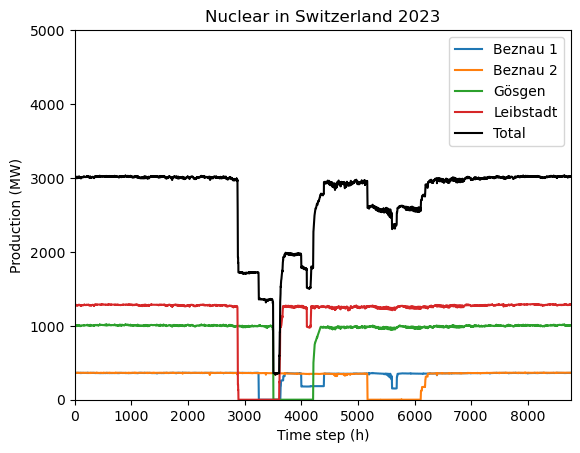

In [10]:
for label, series in CH_nuclear_data.items():
    plt.plot(series, label=CH_nuclear_names[label])
plt.plot(CH_nuclear_total, label='Total', color='black')
plt.legend(loc='upper right')
plt.xlabel('Time step (h)')
plt.ylabel('Production (MW)')
plt.title('Nuclear in Switzerland %d' % year)
plt.xlim(0, len(CH_nuclear_total))
plt.ylim(0, 5000)
plt.savefig('figures/CH_nuclear_%d.pdf' % year)
plt.show()

Export the data in CSV format:

In [11]:
CH_nuclear_data_df = pd.DataFrame({CH_nuclear_names[label].replace(' ', '_'): series for label, series in CH_nuclear_data.items()})
CH_nuclear_data_df.to_csv('data/CH_nuclear_%d.csv' % year)

## Example: hydro in Switzerland

List Switzerland's hydro generators (conventional water reservoirs only):

In [12]:
entso_e.extract_generators_names(data_source, year, 'Hydro Water Reservoir', 'CH')

['Usine de Bieudron',
 'Göschenen',
 'AET Leventina',
 'Centrale di Robiei',
 'Mittelbünden Turbinen',
 'Usine de Vallorcine',
 'Centrale di Verbano',
 'Centrale di Biasca',
 'Stufe FMM Produktion Total',
 'Usine de Nendaz',
 'Centrale di Bavona',
 'Verzasca',
 'Centrale di Olivone',
 'Usine de Fionnay',
 'Usine de la Bâtiaz',
 'Centrale di Cavergno',
 'Kraftwerk Bitsch']

Extract data:

In [13]:
CH_hydro_data = entso_e.extract_production_by_unit_time_series(data_source, year, gen_type = 'Hydro Water Reservoir',
                                                               country_code = 'CH')

  0%|          | 0/12 [00:00<?, ?it/s]

Plot the result and export the figure:

In [14]:
CH_hydro_names = {
    'Usine de Bieudron': 'Usine de Bieudron',
    'Kraftwerk Bitsch': 'Kraftwerk Bitsch',
    'Mittelbünden Turbinen': 'Kraftwerke Mittelbünden',
    'Usine de la Bâtiaz': 'Usine de la Bâtiaz',
    'Centrale di Verbano': 'Centrale di Verbano'
}

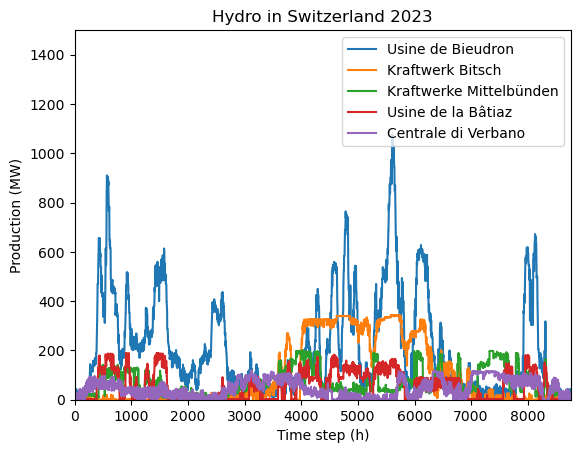

In [15]:
for label, name in CH_hydro_names.items():
    plt.plot(CH_hydro_data[label], label=name)
plt.legend(loc='upper right')
plt.xlabel('Time step (h)')
plt.ylabel('Production (MW)')
plt.title('Hydro in Switzerland %d' % year)
plt.xlim(0, len(next(iter(CH_hydro_data.values()))))
plt.ylim(0, 1500)
plt.savefig('figures/CH_hydro_%d.pdf' % year)
plt.show()

Export the data in CSV format:

In [16]:
CH_hydro_data_df = pd.DataFrame({name.replace(' ', '_'): CH_hydro_data[label] for label, name in CH_hydro_names.items()})
CH_hydro_data_df.to_csv('data/CH_hydro_%d.csv' % year)